In [28]:
import scvi
import scanpy as sc
import pandas as pd
import numpy as np

import json

from pyscenic.aucell import aucell
from ctxcore.genesig import GeneSignature
from pyscenic.aucell import create_rankings, enrichment

In [29]:
adata_bulk = sc.read('zenodo/pb_12_donors_bulk.h5ad')

In [30]:
filename = 'metank_gene_sig.txt'

with open(filename, 'r') as file:
    gene_sig = json.load(file)

In [31]:
signature_genes = [x for x in gene_sig.values()]

In [32]:
gene_sigs = [GeneSignature(name,gene_sig[name]) for name in gene_sig]

In [33]:
adata_bulk

AnnData object with n_obs × n_vars = 23253 × 32549
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'sample', 'batch', 'subset', 'label', 'dataset', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'source', 'tumor_type'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [35]:
exp_df = adata_bulk.to_df()

In [36]:
auc_mtx = aucell(exp_df, gene_sigs, num_workers=4)

In [37]:
adata_bulk.obs[[x + '_auc' for x in auc_mtx.columns]] = auc_mtx.to_numpy()

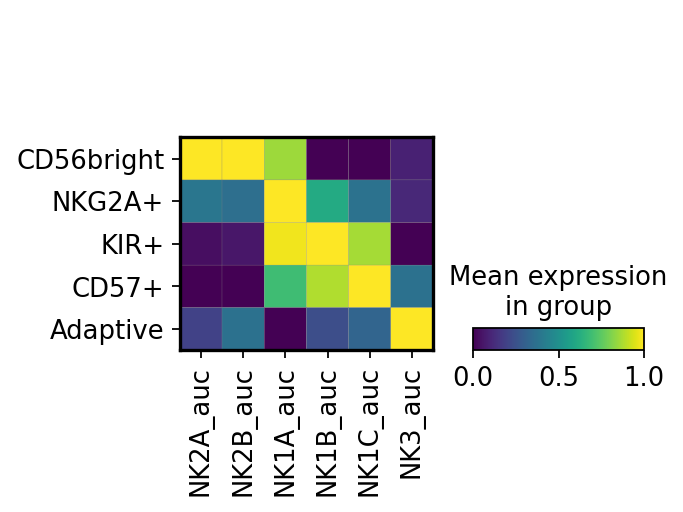

In [140]:
sc.pl.matrixplot(adata_bulk, ['NK2A_auc', 'NK2B_auc', 'NK1A_auc', 'NK1B_auc', 'NK1C_auc', 'NK3_auc'], 
                 standard_scale='var',groupby='C_scANVI', save='metank_sig_scores.pdf')